<a href="https://colab.research.google.com/github/saeed-hossam/diabetes/blob/main/diabetes_prediction_with_97_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Loading DataSet

In [2]:
dia=pd.read_csv('/content/Healthcare-Diabetes.csv')

# Explore Data

### Previewing the First Few Rows of the Diabetes Dataset

In [3]:
dia.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


### Random Sample from the Diabetes Dataset

In [4]:
dia.sample()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2288,2289,1,71,62,0,0,21.8,0.416,26,0


### Dimensions of the Diabetes Dataset

In [5]:
dia.shape

(2768, 10)

### Listing Column Names of the Dataset

In [6]:
dia.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Dataset Information Summary








In [7]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


### Statistical Summary of the Dataset

In [8]:
dia.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


# Data cleaning

### Count of Duplicate Entries in the Dataset

In [9]:
dia.duplicated().sum()

np.int64(0)

### Count of Missing Values in Each Column of the Dataset

In [10]:
dia.isna().sum()

,0
Id,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Data Preprocessing

### Heatmap of Missing Values in the Dataset

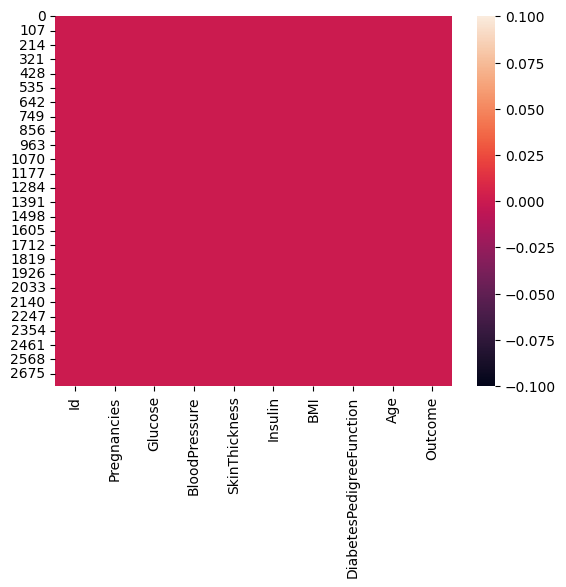

In [11]:
sns.heatmap(dia.isnull())
plt.show()

# Data Analysis And visualization

### Correlation Matrix of Variables in the Dataset

In [12]:
dia.corr()


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Id,1.000000,-0.024222,0.015010,0.009717,0.017702,0.007359,0.024007,-0.009695,-0.007404,-0.006298
Pregnancies,-0.024222,1.000000,0.122839,0.147253,-0.068673,-0.075734,0.018761,-0.027731,0.540805,0.223796
Glucose,0.015010,0.122839,1.000000,0.142095,0.061023,0.323445,0.225308,0.127195,0.256958,0.460644
BloodPressure,0.009717,0.147253,0.142095,1.000000,0.201167,0.087823,0.281560,0.048471,0.238684,0.072900
SkinThickness,0.017702,-0.068673,0.061023,0.201167,1.000000,0.445345,0.393494,0.179830,-0.111895,0.075603
Insulin,0.007359,-0.075734,0.323445,0.087823,0.445345,1.000000,0.215926,0.190500,-0.073458,0.123646
BMI,0.024007,0.018761,0.225308,0.281560,0.393494,0.215926,1.000000,0.129766,0.038175,0.280928
DiabetesPedigreeFunction,-0.009695,-0.027731,0.127195,0.048471,0.179830,0.190500,0.129766,1.000000,0.028544,0.160664
Age,-0.007404,0.540805,0.256958,0.238684,-0.111895,-0.073458,0.038175,0.028544,1.000000,0.237050
Outcome,-0.006298,0.223796,0.460644,0.072900,0.075603,0.123646,0.280928,0.160664,0.237050,1.000000


### Heatmap of Correlation Coefficients Among Variables in the Dataset

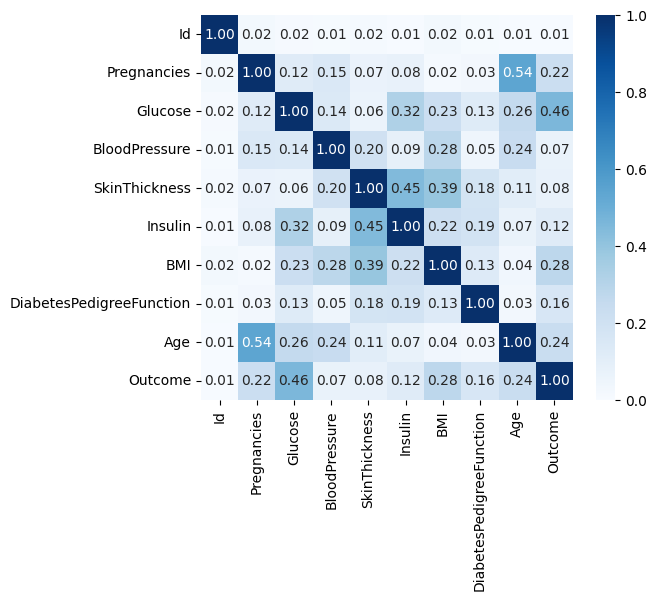

In [13]:
corr=abs(dia.corr())
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, vmin=0, vmax=1, cmap='Blues', fmt='.2f')
plt.show()

###
1️⃣ Strongest Predictor? 📊 – If Glucose has the highest correlation with Outcome, it confirms that blood sugar levels are a major diabetes indicator.

2️⃣ BMI & Age Show Moderate Influence ⚖️⏳ – If BMI and Age have moderate correlations, it suggests that obesity and aging contribute to diabetes risk.

3️⃣ Weak Correlations 🩹 – Features like BloodPressure or SkinThickness might show weak correlations, indicating they have less direct impact on diabetes prediction.

4️⃣ Feature Relationships 🔄 – High correlations between independent features (e.g., Insulin & Glucose) may indicate redundancy or potential multicollinearity in the dataset.

5️⃣ No Negative Correlations? 🤔 – If all correlations are positive, it means increasing any of these factors does not appear to reduce diabetes risk.

### Proportion of Diabetes Cases in the Dataset

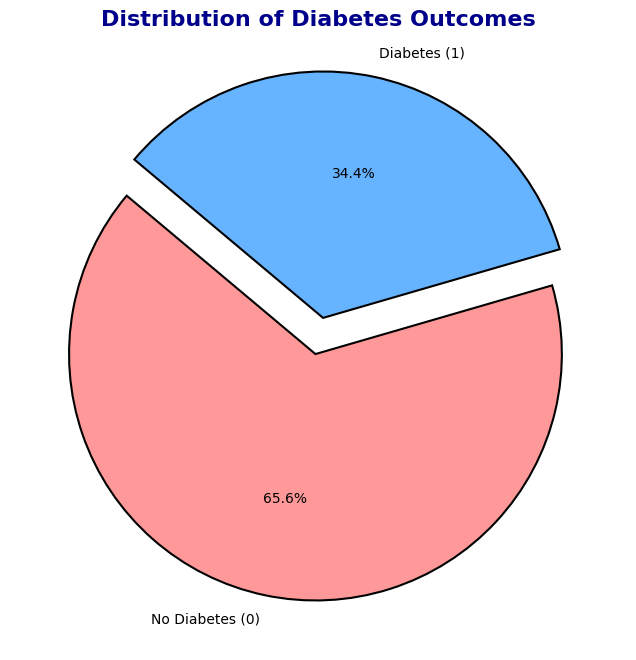

In [14]:

outcome_counts = dia['Outcome'].value_counts()
labels = ['No Diabetes (0)', 'Diabetes (1)']

colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%',
        explode=[0.05, 0.1], startangle=140, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'})

plt.title("Distribution of Diabetes Outcomes", fontsize=16, fontweight='bold', color='darkblue')

plt.show()


### Feature Correlation with Diabetes Outcome

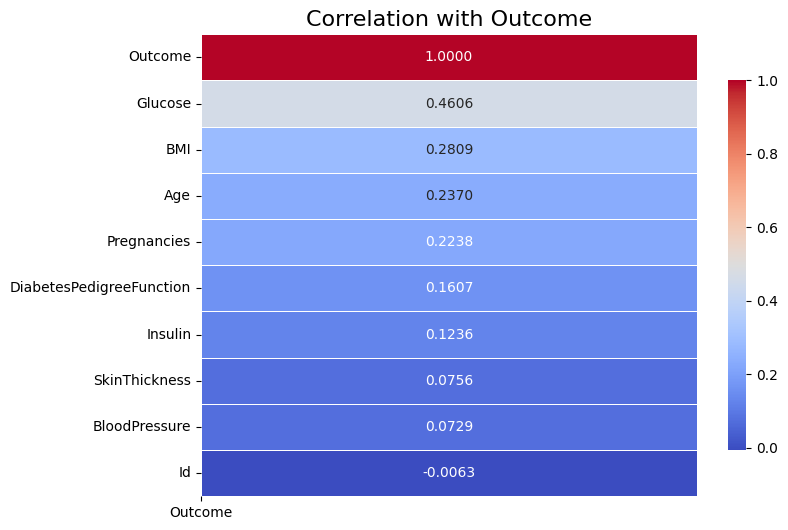

In [15]:
corr = dia.corrwith(dia['Outcome']).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation with Outcome', fontsize=16)
plt.xticks(ticks=[0], labels=['Outcome'], rotation=0)
plt.yticks(rotation=0)
plt.show()


###
1️⃣ Glucose is the King 👑 – If Glucose has the highest correlation, it means blood sugar levels are the strongest predictor of diabetes. The higher it is, the greater the risk! 🚨

2️⃣ BMI Matters! ⚖️ – A higher Body Mass Index (BMI) is strongly linked to diabetes, emphasizing the role of obesity in increasing the risk. 🏋️‍♂️

3️⃣ Age is Not Just a Number ⏳ – Getting older increases the likelihood of diabetes, reflecting the cumulative impact of health factors over time. 🏃‍♂️➡️👴

4️⃣ Weak Links 🤷‍♂️ – Some features, like Blood Pressure and Skin Thickness, may have a weaker influence on diabetes diagnosis. They might play an indirect role. 🔍

5️⃣ Negative Correlations? 🤔 – If any features have a negative correlation, they could indicate protective factors or unexpected influences worth investigating! 📉

### Impact of Glucose Levels on Diabetes Outcome

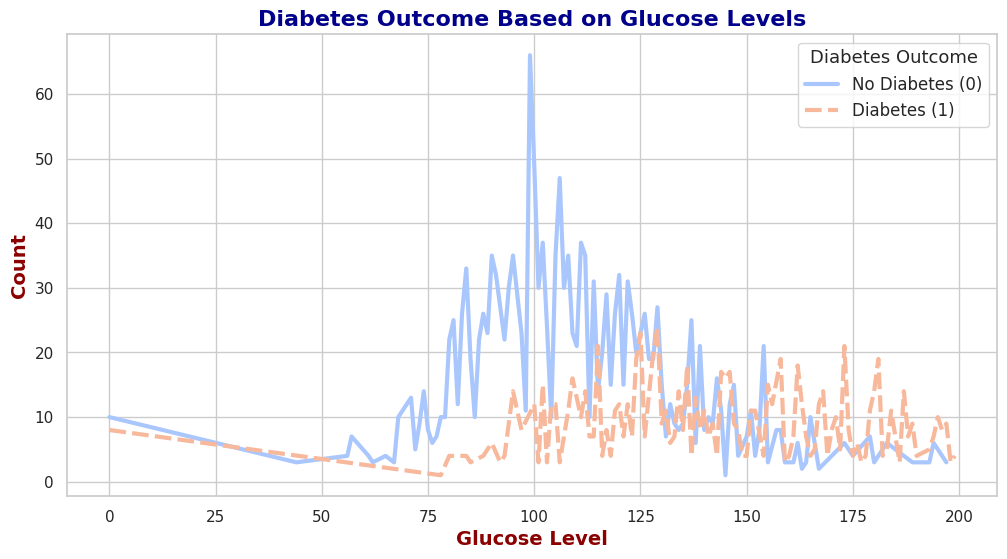

In [16]:

glucose_outcome = dia.groupby("Glucose")['Outcome'].value_counts().unstack()

glucose_outcome.columns = ['No Diabetes (0)', 'Diabetes (1)']

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.lineplot(data=glucose_outcome, linewidth=3, palette="coolwarm")

plt.title('Diabetes Outcome Based on Glucose Levels', fontsize=16, fontweight='bold', color='darkblue')

plt.xlabel('Glucose Level', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='darkred')

plt.legend(title='Diabetes Outcome', title_fontsize=13, fontsize=12)

plt.show()


###
1️⃣ Higher Glucose = Higher Diabetes Cases 🚨 – As glucose levels increase, the number of diabetes cases (1) rises significantly, confirming its strong link to diabetes risk.

2️⃣ Low Glucose, Low Risk ✅ – At lower glucose levels, the majority of cases belong to the "No Diabetes (0)" category, indicating that normal blood sugar is a protective factor.

3️⃣ Threshold Effect ⚠️ – There may be a specific glucose range where diabetes cases start to spike, suggesting a possible diagnostic cutoff for high-risk individuals.

4️⃣ Glucose Variability Matters 🔄 – If the trend fluctuates at certain glucose levels, it might indicate outliers or cases where other factors influence diabetes outcomes.

5️⃣ Steady vs. Sharp Growth 📊 – A gradual increase suggests a progressive risk, while a sharp spike at a certain glucose level might indicate a critical risk zone.

### Diabetes Pedigree Function Distribution & Its Relationship with Age

DiabetesPedigreeFunction
0.258    22
0.207    20
0.268    18
0.238    18
0.261    18
0.259    17
0.284    16
0.520    16
0.292    16
0.551    16
0.254    15
0.304    15
0.692    15
0.197    15
0.452    14
Name: count, dtype: int64



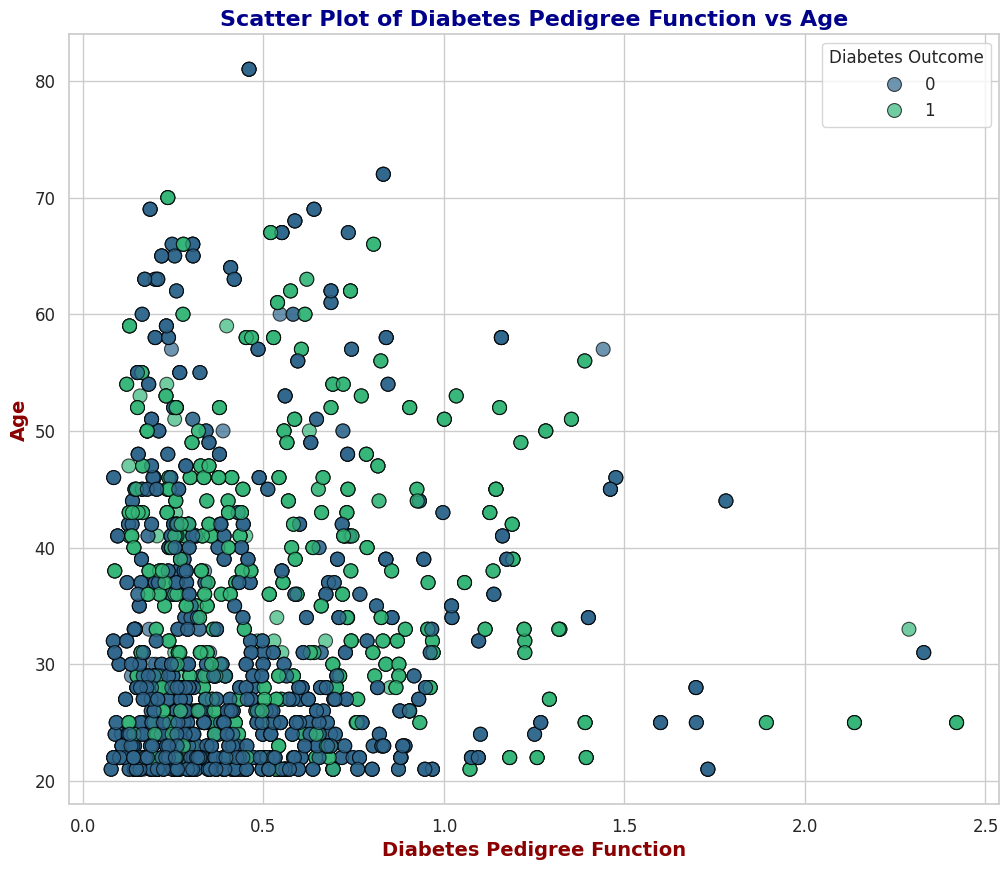

In [17]:

print(dia['DiabetesPedigreeFunction'].value_counts().head(15))
print()

plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

sns.scatterplot(x='DiabetesPedigreeFunction', y='Age', data=dia, hue='Outcome', palette="viridis", s=100, edgecolor="black", alpha=0.7)

plt.title('Scatter Plot of Diabetes Pedigree Function vs Age', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Diabetes Pedigree Function', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Age', fontsize=14, fontweight='bold', color='darkred')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Diabetes Outcome', loc='upper right', fontsize=12)

plt.show()


###
1️⃣ Most Common Pedigree Values 📊 – The top 15 most frequent DiabetesPedigreeFunction values indicate that certain genetic predispositions are more common in the dataset.

2️⃣ Higher Pedigree, Higher Risk? ⚠️ – If the scatterplot shows more diabetes cases (Outcome = 1) at higher DiabetesPedigreeFunction values, it suggests that genetics plays a role in diabetes risk.

3️⃣ Age Factor Matters ⏳ – Older individuals with high DiabetesPedigreeFunction may have a greater likelihood of diabetes, reinforcing the impact of both genetic and age-related risks.

4️⃣ Clusters or Trends? 🔄 – If specific regions of the scatterplot have more cases, it may indicate thresholds where genetic risk becomes significant.

5️⃣ Outliers or Unique Cases? 🔍 – If there are points far from the main cluster, they might represent individuals with unusual risk factors, requiring deeper investigation.

### Visualizing Pregnancies: Count Plot, Distribution Plot, and Box Plot

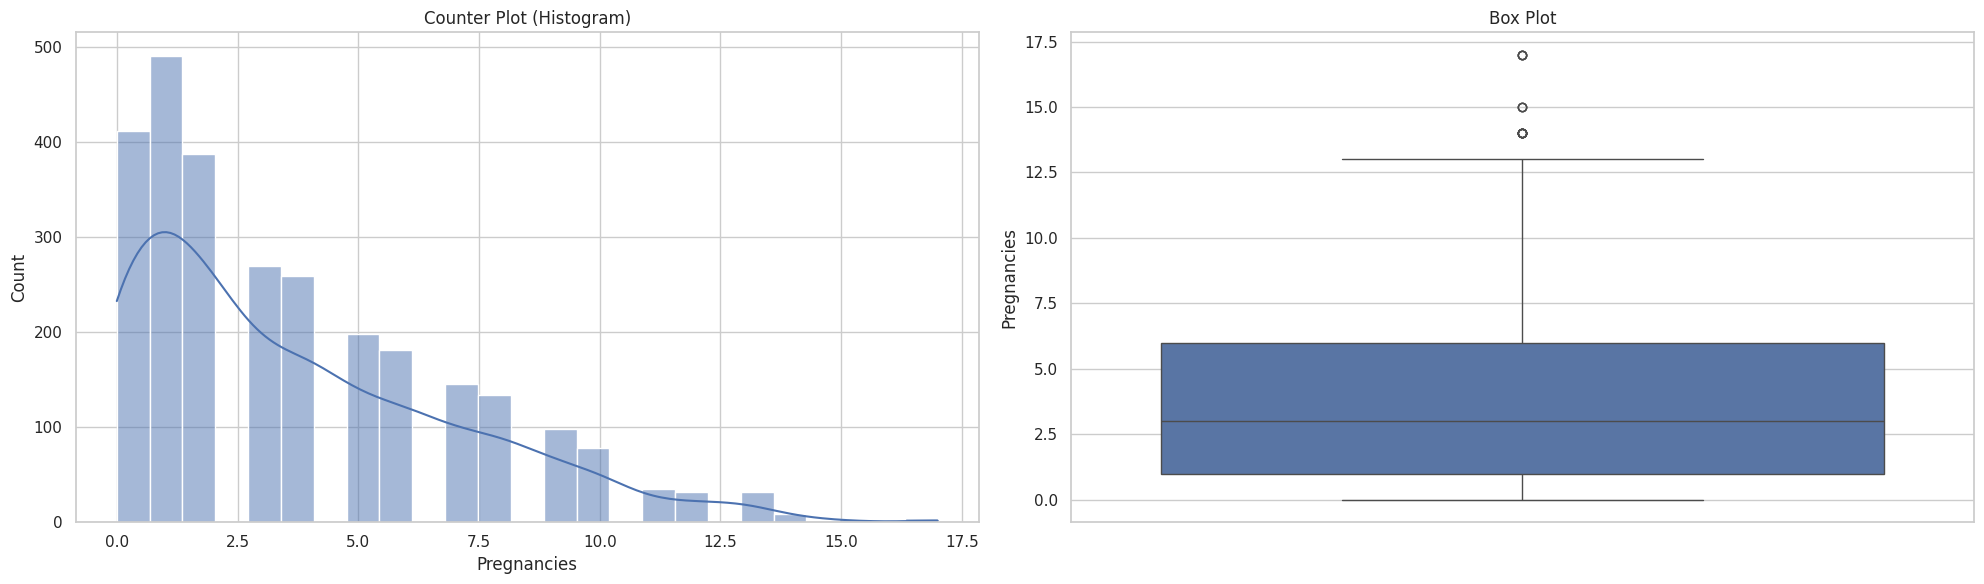

In [18]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title('Counter Plot (Histogram)')
sns.histplot(dia['Pregnancies'], bins=25, kde=True)

plt.subplot(1, 2, 2)
plt.title('Box Plot')
sns.boxplot(y=dia['Pregnancies'])

plt.tight_layout()
plt.show()


###
1️⃣ Most Women Have Few Pregnancies 🤰 – The histogram likely shows that most values are concentrated at the lower end (0–5 pregnancies), indicating that a majority of women in the dataset have had few or no pregnancies.

2️⃣ Skewed Distribution? 📈 – If the histogram is right-skewed, it means that while most women have low pregnancies, a few have significantly higher values, pulling the average up.

3️⃣ Outliers Detected 🚨 – The box plot helps identify extreme values (e.g., pregnancies >10). These might be valid but could also indicate rare cases or data entry issues.

4️⃣ KDE Curve Insight 📊 – The smooth curve over the histogram (Kernel Density Estimate) shows the probability distribution. If it has multiple peaks, it might indicate subgroups within the data.

5️⃣ Possible Impact on Diabetes? 🤔 – If pregnancy count is related to diabetes risk, further analysis could check its correlation with Outcome.

### Cross Tabulation of Pregnancies and Outcome: Analysis of Diabetes Data

Outcome        0    1
Pregnancies          
0            274  138
1            383  108
2            320   67
3            173   97
4            169   90
5            125   73
6            121   60
7             64   81
8             59   75
9             38   60
10            46   32
11            13   22
12            18   14
13            13   19
14             0    9
15             0    3
17             0    4


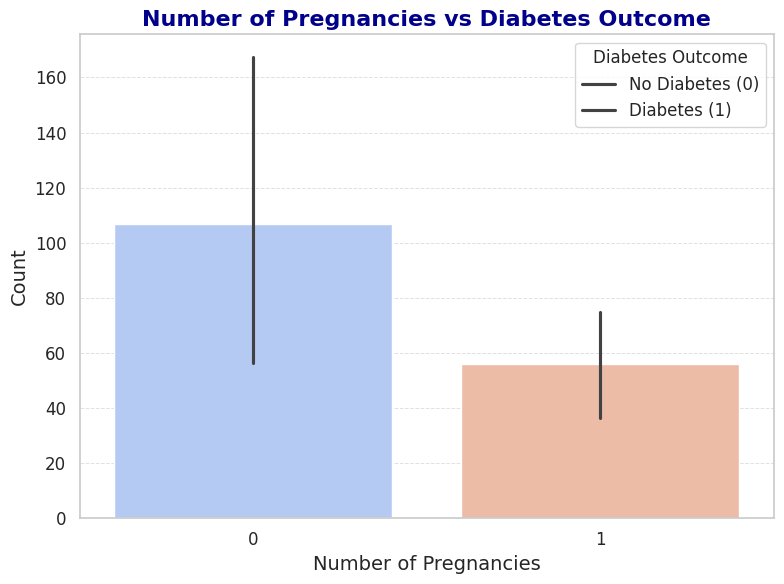

In [19]:

crosstab = pd.crosstab(dia['Pregnancies'], dia['Outcome'])
print(crosstab)

plt.figure(figsize=(8,6))

sns.barplot(data=crosstab, palette='coolwarm')

plt.title('Number of Pregnancies vs Diabetes Outcome', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Number of Pregnancies', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

plt.legend(title='Diabetes Outcome', labels=['No Diabetes (0)', 'Diabetes (1)'], fontsize=12)

plt.tight_layout()
plt.show()


###
1️⃣ More Pregnancies, Higher Diabetes Risk? 🤰➡️🩸 – If diabetes cases (Outcome = 1) increase with pregnancy count, it suggests a possible link between multiple pregnancies and a higher risk of diabetes.

2️⃣ Low Pregnancy Count, Lower Risk ✅ – If women with 0–2 pregnancies mostly fall into the "No Diabetes (0)" category, it indicates that fewer pregnancies might be a protective factor.

3️⃣ Critical Threshold 📉 – There may be a point (e.g., 4+ pregnancies) where diabetes cases start increasing significantly, hinting at a potential risk threshold.

4️⃣ Imbalanced Distribution ⚖️ – If some pregnancy counts have very few cases, it might be harder to draw conclusions for those groups, requiring larger datasets for better insights.

5️⃣ Outliers & Rare Cases 🔍 – If women with very high pregnancy counts still have low diabetes cases, it could suggest other protective factors (e.g., lifestyle, genetics).

### Box Plot of Ages in Diabetes Dataset: Distribution Analysis

0     50
1     31
2     32
3     21
4     33
5     30
6     26
7     29
8     53
9     54
10    30
11    34
12    57
13    59
14    51
Name: Age, dtype: int64
Mean= 33.13222543352601
---------------------------------------------------------------------------


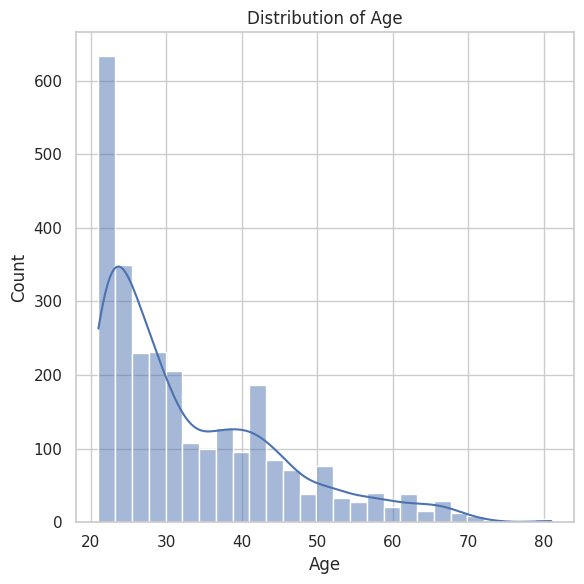

In [20]:
print(dia.Age.head(15))
plt.figure(figsize=(6,6))
print("Mean=",dia['Age'].mean())
print("-"*75)
sns.histplot(dia['Age'], kde=True)
plt.title('Distribution of Age')
plt.tight_layout()
plt.show()

### Calculating the Mean Age of Participants in the Diabetes Dataset

In [21]:
dia.Age.mean()

np.float64(33.13222543352601)

### Identifying Non-Diabetic Individuals Aged Above 34 in the Dataset

In [22]:
people_above_34 = dia[(dia['Age'] >34) & (dia['Outcome'] == 0)]
people_above_34.head(15)


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
12,13,10,139,80,0,0,27.1,1.441,57,0
21,22,8,99,84,0,0,35.4,0.388,50,0
28,29,13,145,82,19,110,22.2,0.245,57,0
29,30,5,117,92,0,0,34.1,0.337,38,0
30,31,5,109,75,26,0,36.0,0.546,60,0
34,35,10,122,78,31,0,27.6,0.512,45,0
36,37,11,138,76,0,0,33.2,0.420,35,0
41,42,7,133,84,0,0,40.2,0.696,37,0
42,43,7,106,92,18,0,22.7,0.235,48,0
44,45,7,159,64,0,0,27.4,0.294,40,0


### Identifying Diabetic Individuals Aged Above 34 in the Dataset

In [23]:
people_above_34 = dia[(dia['Age'] >34) & (dia['Outcome'] == 1)]
people_above_34.head(15)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1
13,14,1,189,60,23,846,30.1,0.398,59,1
14,15,5,166,72,19,175,25.8,0.587,51,1
22,23,7,196,90,0,0,39.8,0.451,41,1
24,25,11,143,94,33,146,36.6,0.254,51,1
25,26,10,125,70,26,115,31.1,0.205,41,1
26,27,7,147,76,0,0,39.4,0.257,43,1
37,38,9,102,76,37,0,32.9,0.665,46,1


### Identifying Non-Diabetic Individuals Aged 34 or Below in the Dataset

In [24]:
people_less_34 = dia[(dia['Age'] >34) & (dia['Outcome'] == 0)]
people_less_34.head(15)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
12,13,10,139,80,0,0,27.1,1.441,57,0
21,22,8,99,84,0,0,35.4,0.388,50,0
28,29,13,145,82,19,110,22.2,0.245,57,0
29,30,5,117,92,0,0,34.1,0.337,38,0
30,31,5,109,75,26,0,36.0,0.546,60,0
34,35,10,122,78,31,0,27.6,0.512,45,0
36,37,11,138,76,0,0,33.2,0.420,35,0
41,42,7,133,84,0,0,40.2,0.696,37,0
42,43,7,106,92,18,0,22.7,0.235,48,0
44,45,7,159,64,0,0,27.4,0.294,40,0


### Identifying Diabetic Individuals Aged 34 or Below in the Dataset

In [25]:
people_less_34 = dia[(dia['Age'] >34) & (dia['Outcome'] == 1)]
people_less_34.head(15)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1
13,14,1,189,60,23,846,30.1,0.398,59,1
14,15,5,166,72,19,175,25.8,0.587,51,1
22,23,7,196,90,0,0,39.8,0.451,41,1
24,25,11,143,94,33,146,36.6,0.254,51,1
25,26,10,125,70,26,115,31.1,0.205,41,1
26,27,7,147,76,0,0,39.4,0.257,43,1
37,38,9,102,76,37,0,32.9,0.665,46,1


### Distribution Analysis of Key Health Indicators

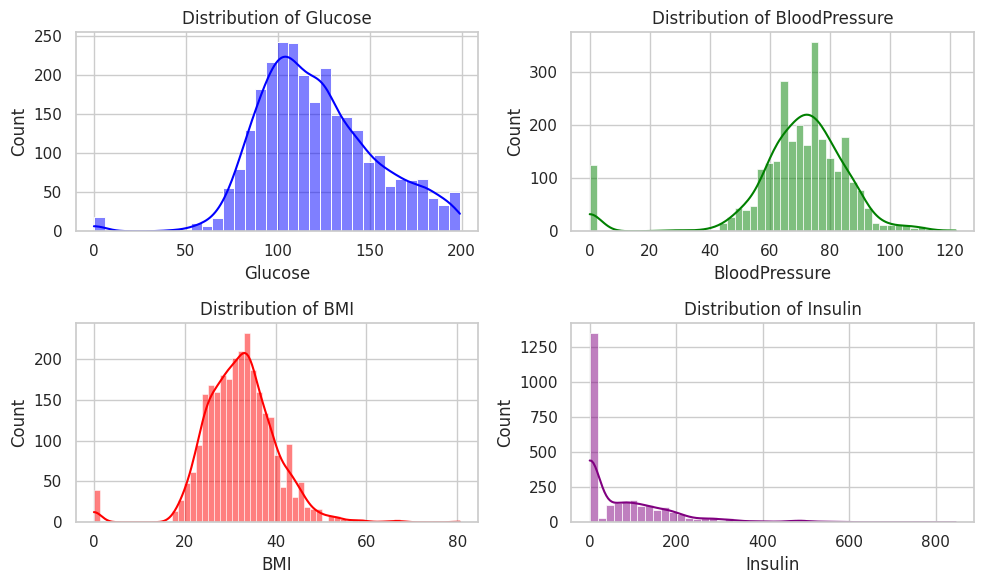

In [26]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(dia['Glucose'], kde=True, color='blue')
plt.title('Distribution of Glucose')

plt.subplot(2, 2, 2)
sns.histplot(dia['BloodPressure'], kde=True, color='green')
plt.title('Distribution of BloodPressure')

plt.subplot(2, 2, 3)
sns.histplot(dia['BMI'], kde=True, color='red')
plt.title('Distribution of BMI')

plt.subplot(2, 2, 4)
sns.histplot(dia['Insulin'], kde=True, color='purple')
plt.title('Distribution of Insulin')

plt.tight_layout()
plt.show()

###
1️⃣ Glucose Levels (🔵) – If the distribution is right-skewed, it suggests that while most individuals have normal glucose levels, some have dangerously high values, increasing diabetes risk.

2️⃣ Blood Pressure (🟢) – A normal distribution here would indicate that most individuals have average blood pressure, but if it's skewed, it may suggest hypertension issues in certain groups.

3️⃣ BMI (🔴) – If the distribution is shifted to the right, it may indicate that obesity is common in the dataset, reinforcing its link to diabetes risk.

4️⃣ Insulin Levels (🟣) – If the insulin distribution has a long tail, it may suggest that some individuals have abnormally high insulin levels, possibly indicating insulin resistance or metabolic disorders.

### Comparative Distribution of Key Health Metrics by Diabetes Outcome

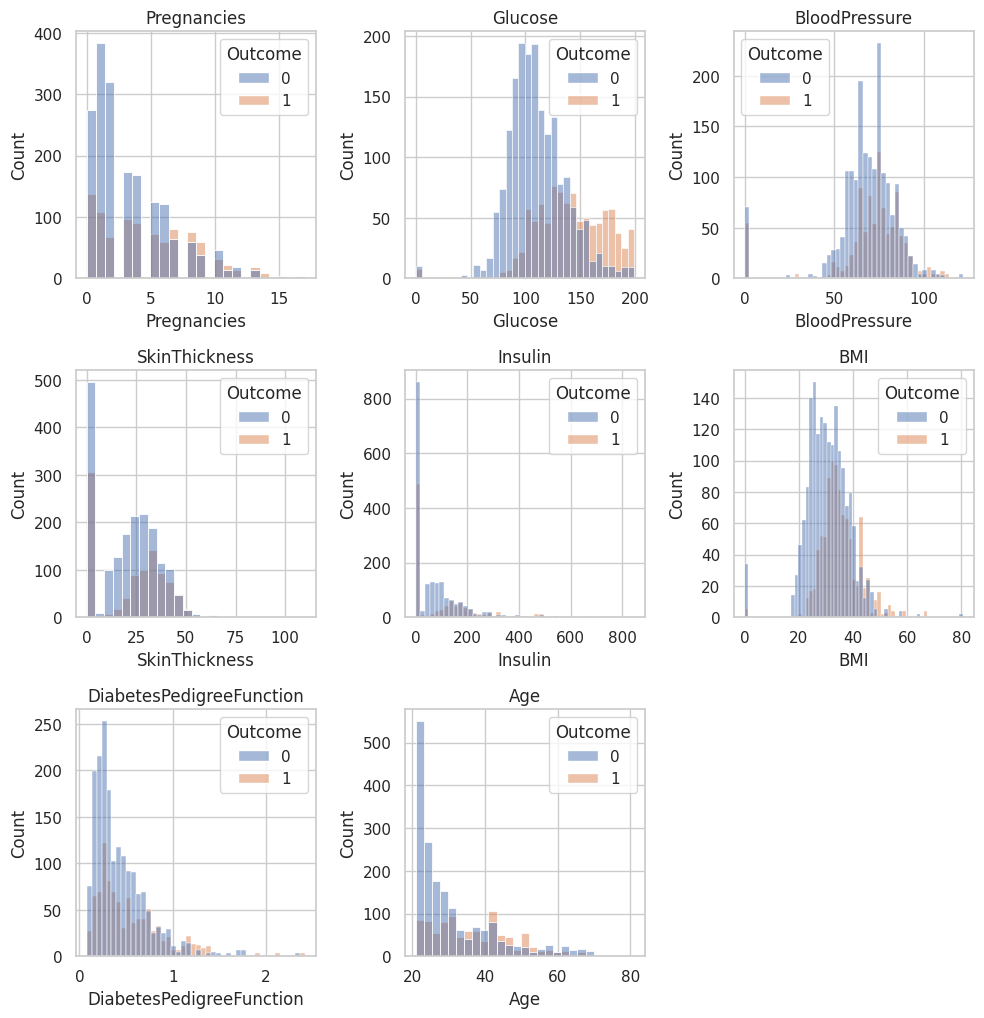

In [27]:
num_list=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
fig = plt.figure(figsize=(10,20))
for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=dia,x=dia[num_list[i]],hue='Outcome')

plt.tight_layout()


###
1️⃣ Glucose & BMI Show Clear Separation 🩸⚖️ – If there's a strong distinction in glucose and BMI distributions between diabetes (1) and non-diabetes (0) cases, these are likely strong predictors of diabetes.

2️⃣ Age Factor ⏳ – If older individuals (higher Age values) have a higher proportion of diabetes cases, it suggests age-related risks.

3️⃣ Blood Pressure & Skin Thickness 🩹 – If their distributions overlap significantly between outcomes, they may have weaker predictive power for diabetes.

4️⃣ Insulin Levels & Diabetes Pedigree Function 🧬 – If high insulin or family history (DiabetesPedigreeFunction) is linked to more diabetes cases, it reinforces their role in genetic and metabolic risks.

5️⃣ Pregnancies & Diabetes Risk 🤰 – If higher pregnancy counts show more diabetes cases, it could indicate gestational diabetes risk factors.

# Data Preprocessing for Model

In [28]:
dia.drop('Id', axis=1, inplace=True)

### Outlier Detection Using IQR Method

In [29]:
def detect_outliers(data):
    outlier_info = {}

    for column in data.select_dtypes(include=['number']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_info[column] = {
            "num_outliers": len(outliers),
            "outlier_indices": outliers.index.tolist(),
        }

    return outlier_info

### Outlier Detection Report | Identifying Anomalies in Data

In [30]:
outliers = detect_outliers(dia)
columns=[]
for col, info in outliers.items():
    columns.append(col)
    print(f"Column: {col}")
    print(f"Number of Outliers: {info['num_outliers']}")
    print("-" * 50)

Column: Pregnancies
Number of Outliers: 16
--------------------------------------------------
Column: Glucose
Number of Outliers: 18
--------------------------------------------------
Column: BloodPressure
Number of Outliers: 158
--------------------------------------------------
Column: SkinThickness
Number of Outliers: 5
--------------------------------------------------
Column: Insulin
Number of Outliers: 103
--------------------------------------------------
Column: BMI
Number of Outliers: 77
--------------------------------------------------
Column: DiabetesPedigreeFunction
Number of Outliers: 97
--------------------------------------------------
Column: Age
Number of Outliers: 64
--------------------------------------------------
Column: Outcome
Number of Outliers: 0
--------------------------------------------------


### Handling Outliers in Glucose Levels | Adjusted Using IQR Method

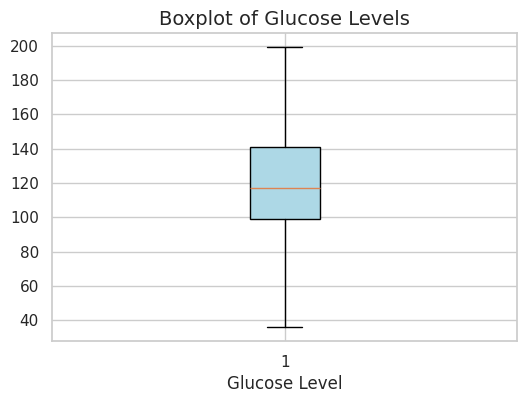

In [31]:
Q1 = dia['Glucose'].quantile(0.25)
Q3 = dia['Glucose'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dia['Glucose'] = np.where(dia['Glucose'] > upper_bound, upper_bound, dia['Glucose'])
dia['Glucose'] = np.where(dia['Glucose'] < lower_bound, lower_bound, dia['Glucose'])
plt.figure(figsize=(6,4))
plt.boxplot(dia['Glucose'] ,patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot of Glucose Levels", fontsize=14)
plt.xlabel("Glucose Level")
plt.show()


### Refined Blood Pressure Distribution  | Outliers Removed for Better Insights

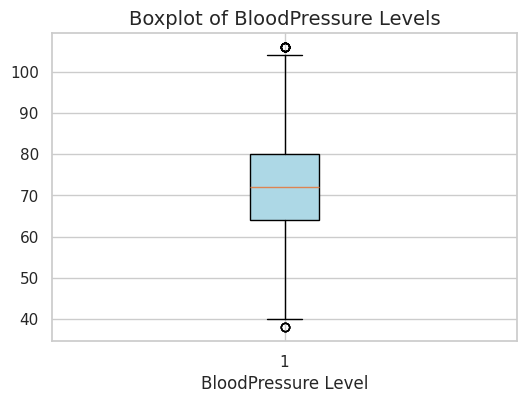

In [32]:
Q1 = dia['BloodPressure'].quantile(0.25)
Q3 = dia['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dia = dia[(dia['BloodPressure'] >= lower_bound) & (dia['BloodPressure'] <= upper_bound)]
plt.figure(figsize=(6,4))
plt.boxplot(dia['BloodPressure'] ,patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot of BloodPressure Levels", fontsize=14)
plt.xlabel("BloodPressure Level")
plt.show()


### Handling Outliers in BMI Using IQR Method

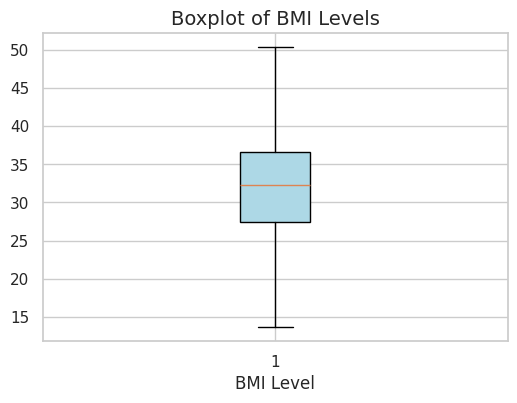

In [33]:
Q1 = dia['BMI'].quantile(0.25)
Q3 = dia['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dia['BMI'] = np.where(dia['BMI'] > upper_bound, upper_bound, dia['BMI'])
dia['BMI'] = np.where(dia['BMI'] < lower_bound, lower_bound, dia['BMI'])
plt.figure(figsize=(6,4))
plt.boxplot(dia['BMI'] ,patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot of BMI Levels", fontsize=14)
plt.xlabel("BMI Level")
plt.show()


### Transformed Insulin Levels | Boxplot After Log Transformation

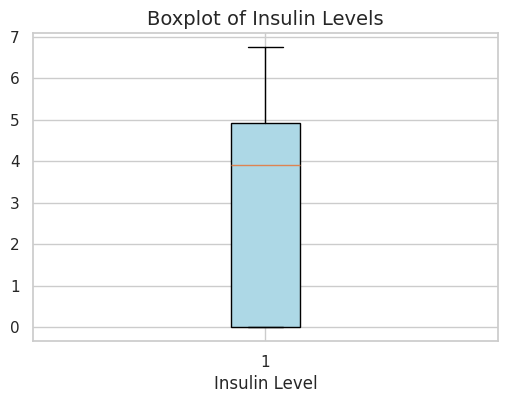

In [34]:
dia['Insulin'] = np.log1p(dia['Insulin'])
plt.figure(figsize=(6,4))
plt.boxplot(dia['Insulin'] ,patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot of Insulin Levels", fontsize=14)
plt.xlabel("Insulin Level")
plt.show()


### Refined Boxplot of SkinThickness  | Outliers Removed for Better Insights

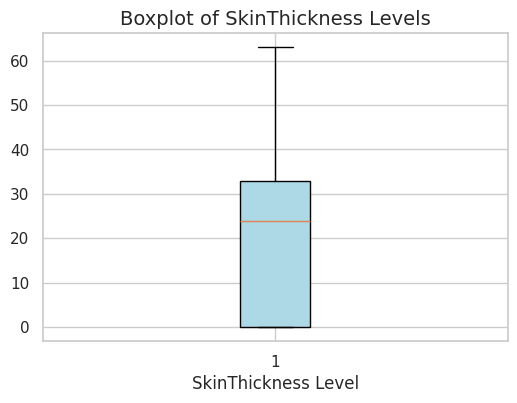

In [35]:
Q1 = dia['SkinThickness'].quantile(0.25)
Q3 = dia['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dia = dia[(dia['SkinThickness'] >= lower_bound) & (dia['SkinThickness'] <= upper_bound)]
plt.figure(figsize=(6,4))
plt.boxplot(dia['SkinThickness'] ,patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot of SkinThickness Levels", fontsize=14)
plt.xlabel("SkinThickness Level")
plt.show()


### Transformed Boxplot of Diabetes Pedigree Function

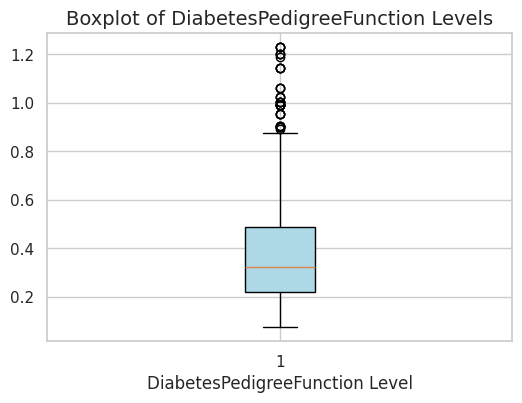

In [36]:
dia['DiabetesPedigreeFunction'] = np.log1p(dia['DiabetesPedigreeFunction'])
plt.figure(figsize=(6,4))
plt.boxplot(dia['DiabetesPedigreeFunction'] ,patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot of DiabetesPedigreeFunction Levels", fontsize=14)
plt.xlabel("DiabetesPedigreeFunction Level")
plt.show()

### Boxplot of Age After Outlier Handling

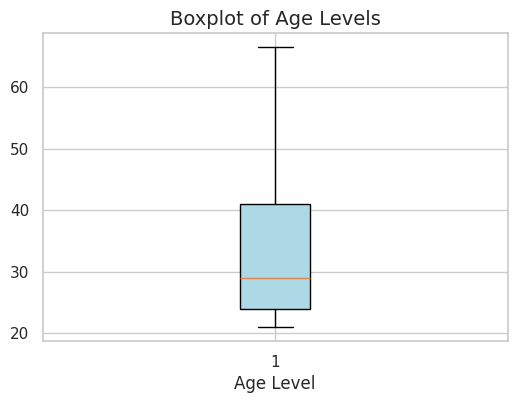

In [37]:
Q1 = dia['Age'].quantile(0.25)
Q3 = dia['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dia['Age'] = np.where(dia['Age'] > upper_bound, upper_bound, dia['Age'])
dia['Age'] = np.where(dia['Age'] < lower_bound, lower_bound, dia['Age'])
plt.figure(figsize=(6,4))
plt.boxplot(dia['Age'] ,patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot of Age Levels", fontsize=14)
plt.xlabel("Age Level")
plt.show()


### Boxplot of Pregnancies After Outlier Handling

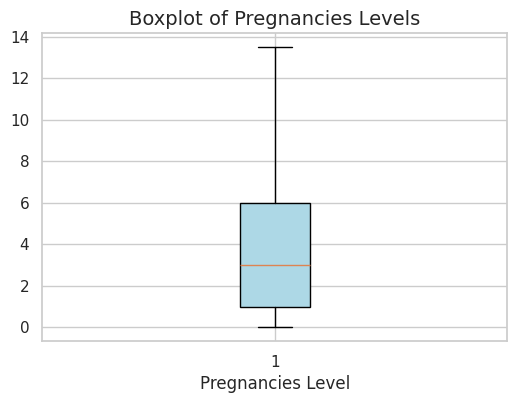

In [38]:
Q1 = dia['Pregnancies'].quantile(0.25)
Q3 = dia['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dia['Pregnancies'] = np.where(dia['Pregnancies'] > upper_bound, upper_bound, dia['Pregnancies'])
dia['Pregnancies'] = np.where(dia['Pregnancies'] < lower_bound, lower_bound, dia['Pregnancies'])
plt.figure(figsize=(6,4))
plt.boxplot(dia['Pregnancies'] ,patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot of Pregnancies Levels", fontsize=14)
plt.xlabel("Pregnancies Level")
plt.show()


### Final Outlier Report | Outliers Successfully Handled

In [39]:
outliers = detect_outliers(dia)
columns=[]
for col, info in outliers.items():
    columns.append(col)
    print(f"Column: {col}")
    print(f"Number of Outliers: {info['num_outliers']}")
    print("-" * 50)

Column: Pregnancies
Number of Outliers: 0
--------------------------------------------------
Column: Glucose
Number of Outliers: 0
--------------------------------------------------
Column: BloodPressure
Number of Outliers: 16
--------------------------------------------------
Column: SkinThickness
Number of Outliers: 0
--------------------------------------------------
Column: Insulin
Number of Outliers: 0
--------------------------------------------------
Column: BMI
Number of Outliers: 0
--------------------------------------------------
Column: DiabetesPedigreeFunction
Number of Outliers: 41
--------------------------------------------------
Column: Age
Number of Outliers: 0
--------------------------------------------------
Column: Outcome
Number of Outliers: 0
--------------------------------------------------


### Encoding Categorical Features | Transforming Text into Numbers

In [40]:
label_encoders = {}
for col in dia.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

### Feature-Target Separation | Preparing Data for Modeling

In [41]:
X = dia.drop(columns=["Outcome"])
y = dia["Outcome"]

### Feature Scaling with StandardScaler  | Preparing Data for Modeling

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X_scaled

array([[ 0.68699902,  0.85231366, -0.01433968, ...,  0.18994319,
         0.59833227,  1.44987074],
       [-0.84038154, -1.16188579, -0.53840812, ..., -0.84773893,
        -0.34057066, -0.18289642],
       [ 1.29795124,  1.97131336, -0.7130976 , ..., -1.33693193,
         0.73613103, -0.09696131],
       ...,
       [ 1.29795124,  1.84342768, -0.01433968, ...,  0.05652692,
         0.87614974,  0.24677914],
       [ 0.68699902, -1.16188579,  0.50972876, ..., -0.16583353,
        -0.22598537,  0.76238983],
       [-0.53490543, -1.28977147, -0.01433968, ..., -0.32889787,
         0.34367079, -0.69850711]])

### Splitting Data into Training & Testing Sets  | 80% Train - 20% Test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

### "Dataset Shape Overview  | Training & Testing Split Details

In [45]:
print(f"The Shape Of X_train {X_train.shape}")
print(f"The Shape Of X_test {X_test.shape}")
print(f"The Shape Of y_train {y_train.shape}")
print(f"The Shape Of y_test {y_test.shape}")

The Shape Of X_train (2085, 8)
The Shape Of X_test (522, 8)
The Shape Of y_train (2085,)
The Shape Of y_test (522,)


# Create Model

### Initializing Machine Learning Models  | Ready for Training

In [46]:
Random_Forest = RandomForestClassifier(n_estimators=185,max_depth=9,random_state=42)
DecisionTreeClassifier = DecisionTreeClassifier(max_depth=10,random_state=20)
svm=SVC()

### Model Evaluation & Performance Metrics  | Classification Report & Confusion Matrix

In [47]:
def models(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(report)
    print("-"*54)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="magma")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

### Evaluating Support Vector Machine Model  | Performance Insights

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       350
           1       0.77      0.56      0.65       172

    accuracy                           0.80       522
   macro avg       0.79      0.74      0.75       522
weighted avg       0.80      0.80      0.79       522

------------------------------------------------------


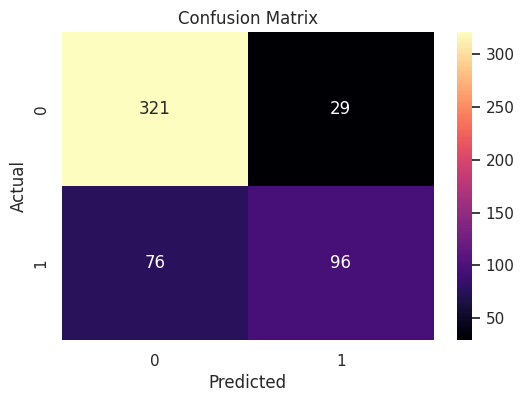

In [48]:
models(svm)

### Evaluating Decision Tree Model | Performance Insights

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       350
           1       0.95      0.82      0.88       172

    accuracy                           0.93       522
   macro avg       0.93      0.90      0.91       522
weighted avg       0.93      0.93      0.93       522

------------------------------------------------------


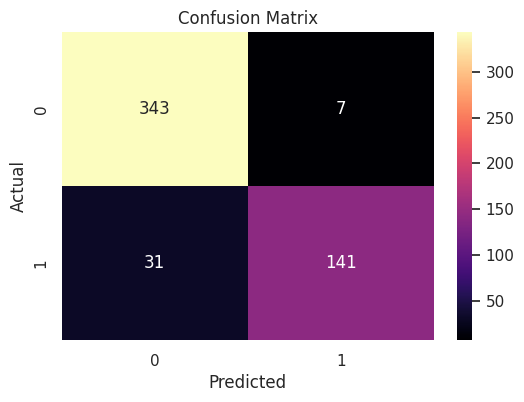

In [49]:
models(DecisionTreeClassifier)

### Evaluating Random Forest Model | Performance Insights

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       350
           1       0.96      0.93      0.95       172

    accuracy                           0.97       522
   macro avg       0.97      0.96      0.96       522
weighted avg       0.97      0.97      0.97       522

------------------------------------------------------


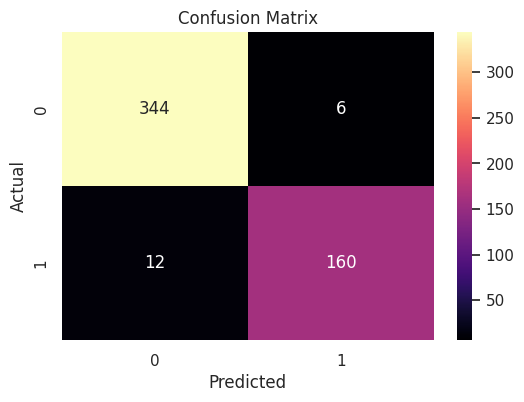

In [50]:
models(Random_Forest)

### Model Performance Analysis: Who Wins the Accuracy Race

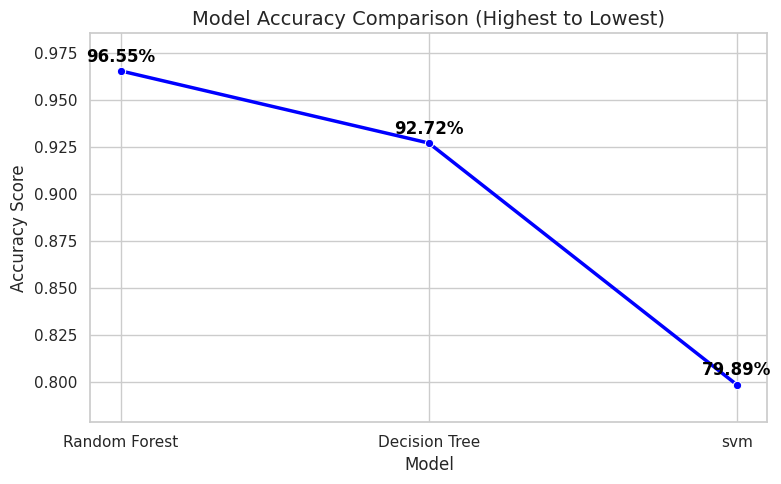

In [51]:
LR_acc = svm.score(X_test, y_test)
DT_acc = DecisionTreeClassifier.score(X_test, y_test)
RF_acc = Random_Forest.score(X_test, y_test)

models = pd.DataFrame({
    'Model': ['Random Forest', 'svm', 'Decision Tree'],
    'Accuracy Score': [RF_acc, LR_acc, DT_acc]
})

models = models.sort_values(by='Accuracy Score', ascending=False).reset_index(drop=True)

plt.figure(figsize=(8, 5))
sns.lineplot(data=models, x='Model', y='Accuracy Score', marker='o', linewidth=2.5, color='blue')

for i, row in models.iterrows():
    plt.text(i, row['Accuracy Score'] + 0.005, f"{row['Accuracy Score'] * 100:.2f}%",
             ha='center', fontsize=12, color='black', fontweight='bold')

plt.title('Model Accuracy Comparison (Highest to Lowest)', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(models['Accuracy Score'].min() - 0.02, models['Accuracy Score'].max() + 0.02)
plt.tight_layout()
plt.show()


### Thank you everyone,I hope the notebook is useful for everyone